In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed to make results reproducible
np.random.seed(0)

# Interaction terms

The effect of a specific variable on the dependent variable (y) does not always only depend on that specific variable alone.

Let's take the example of annual salary again. We have talked about the annual salary of a person being dependent on the years of working experience. Additionally, the annual salary could for example depend on the person having a university degree. Maybe the salary also increases at a different rate for people with or without university degree. In this case we need an interaction between years of work experience and university degree term to include this relationship in the linear regression. University degree is 0 or 1.

$$
annual\_salary = b + w_1 * work\_experience + w_2 * university\_degree + w_3 * work\_experience * university\_degree + \epsilon
$$

In [6]:
# Coefficients

# b: 
b = 20_000

# w_1: 
w_1 = 1_000

# w_2: 
w_2 = 5_000

# w_3: 
w_3 = 1_000

In [7]:
def annual_salary(work_experience, university_degree, sample_size, b, w_1, w_2, w_3):
    '''Calculate the annual salary based on the work_experience and whether or not the person has a university_degree'''
    return b + w_1*work_experience + w_2*university_degree + \
           w_3*work_experience*university_degree + \
           np.random.randn(sample_size) * 10_000

In [8]:
sample_size = 100

university_degree = np.random.randint(2, size=sample_size)
work_experience = np.random.randint(50, size=sample_size)

In [9]:
salaries = annual_salary(work_experience, university_degree, sample_size
                        , b, w_1, w_2, w_3)

In [10]:
df = pd.DataFrame(
    {
     'salaries': salaries, 
     'work_experience': work_experience,
     'university_degree': university_degree
    })
df.head()

,salaries,work_experience,university_degree
0,59276.751655,44,0
1,42366.558731,3,0
2,101773.404214,31,1
3,42151.098915,9,1
4,49276.965701,10,1


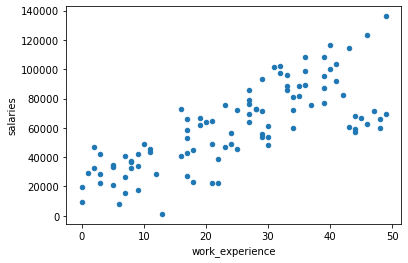

In [16]:
# Plot the result with df.sort_values
df.plot(x='work_experience', y='salaries'
        , kind='scatter')

In [17]:
# Fit the model
from sklearn.linear_model import LinearRegression

In [19]:
# We need to create our features
# df['interaction'] = df['work_experience']*df['university_degree']

from sklearn.preprocessing import PolynomialFeatures

In [32]:
# Create interaction terms
interaction_transformer = PolynomialFeatures(interaction_only=True, include_bias=False)
interaction_features = interaction_transformer.fit_transform(df[['work_experience', 'university_degree']])
interaction_features = pd.DataFrame(interaction_features, columns=interaction_transformer.get_feature_names())
interaction_features

,x0,x1,x0^2,x0 x1,x1^2
0,44.0,0.0,1936.0,0.0,0.0
1,3.0,0.0,9.0,0.0,0.0
2,31.0,1.0,961.0,31.0,1.0
3,9.0,1.0,81.0,9.0,1.0
4,10.0,1.0,100.0,10.0,1.0
...,...,...,...,...,...
95,8.0,1.0,64.0,8.0,1.0
96,7.0,1.0,49.0,7.0,1.0
97,23.0,0.0,529.0,0.0,0.0
98,13.0,0.0,169.0,0.0,0.0


In [24]:
m = LinearRegression()
m.fit(interaction_features, df['salaries'])

LinearRegression()

In [35]:
# Resulting coefficients of the model
w_1 = m.coef_[0]
w_2 = m.coef_[1]
w_3 = m.coef_[2]

In [25]:
# Create predictions
ypred = m.predict(interaction_features)

In [26]:
# Plot the results
def plot_results(ypred, y_true, x):
    plt.figure(figsize=(12, 8))
    plt.scatter(x, y_true, color='b')
    plt.scatter(x, ypred, color='r')
    plt.show()

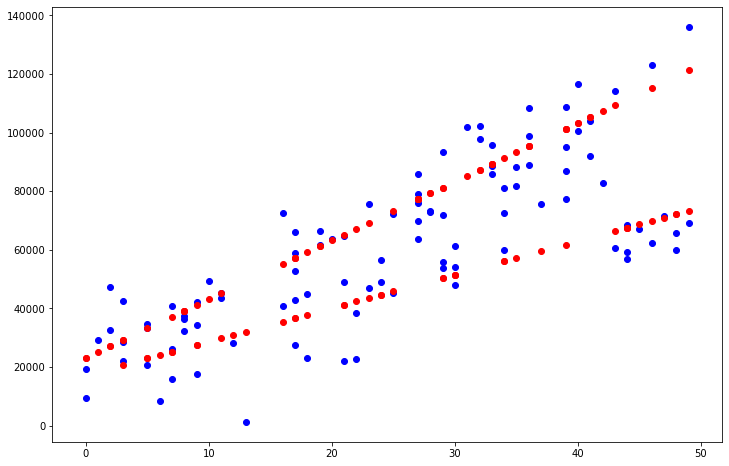

In [27]:
plot_results(ypred, df['salaries'], df[['work_experience']])